In [2]:
import networkx as nx
import os
import json
import pickle
from tqdm import tqdm  # Importing tqdm for the progress bar

directory_path = './data'
network_file = 'network.pkl'

def load_network(file_path):
    with open(file_path, 'rb') as f:
        return pickle.load(f)

def save_network(graph, file_path):
    with open(file_path, 'wb') as f:
        pickle.dump(graph, f)

if os.path.exists(network_file):
    G = load_network(network_file)
else:
    G = nx.DiGraph()
    # First collect all json file paths
    json_files = []
    for subdir, dirs, files in os.walk(directory_path):
        for file in files:
            if file.endswith(".json"):
                json_files.append(os.path.join(subdir, file))
                
    # Now process each file with a progress bar
    for filepath in tqdm(json_files, desc="Creating Network"):
        with open(filepath, 'r', encoding='utf-8') as json_file:
            data = json.load(json_file)
            page_title = data['title']
            G.add_node(page_title)
            for outpage in data['outpages']:
                G.add_edge(page_title, outpage)
    save_network(G, network_file)


Number of Nodes: 26720
Number of Edges: 44777
Average Degree: 3.35


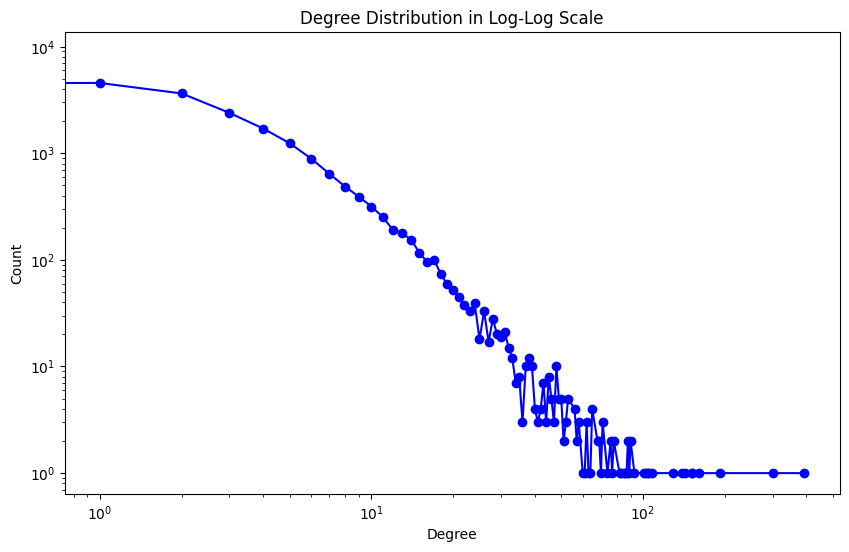

Graph Density: 0.0001


In [3]:
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt

# Assuming G is your graph

# Number of nodes and edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(f"Number of Nodes: {num_nodes}")
print(f"Number of Edges: {num_edges}")

# Average degree
avg_degree = sum(dict(G.degree()).values()) / num_nodes
print(f"Average Degree: {avg_degree:.2f}")

# Degree distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = Counter(degree_sequence)
deg, cnt = zip(*degree_count.items())

plt.figure(figsize=(10, 6))
plt.loglog(deg, cnt, 'bo-')  # use loglog scale and change from bar to scatter plot
plt.title("Degree Distribution in Log-Log Scale")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

# Graph density
density = nx.density(G)
print(f"Graph Density: {density:.4f}")


In [4]:
import pandas as pd

all_names = pd.read_csv("../all_page_names.csv")

len(all_names["Page Names"]) ,len(set(all_names["Page Names"])) # some games names are repeated curios! 

(27362, 26720)

In [5]:
# Visualize graph
import networkx as nx
# pos = nx.spring_layout(G)
# nx.draw(G)
# plt.show()

In [6]:
# Maybe we need this
import powerlaw

fit = powerlaw.Fit(degree_sequence)
alpha = fit.power_law.alpha

print(f"Estimated Power-Law Exponent (alpha): {alpha}")

Calculating best minimal value for power law fit
Estimated Power-Law Exponent (alpha): 3.337340469738638


Values less than or equal to 0 in data. Throwing out 0 or negative values


In [7]:
from math import log

connected = False
k_avg = sum(dict(G.degree()).values()) / len(G)

print(f"<k>={k_avg} & ln(N)={log(num_nodes)}")

response = ""

if 0 < k_avg < 1:
    response += "The network is in the subcritical regime "
elif k_avg == 1:
    response += "The network is in the critical point regime "
elif k_avg > 1:
    response += "The network is in the supercritical regime"
elif k_avg > log(num_nodes):
    response += "The network is in the connected regime"
response +=  "and is not connected."
print(response)

<k>=3.3515718562874253 & ln(N)=10.193167627650581
The network is in the supercritical regimeand is not connected.


In [8]:
sorted([(n, d) for n, d in G.in_degree()], key= lambda x: x[1], reverse=True)

[('Pac-Man', 237),
 ('Tetris', 187),
 ('Arcade Archives', 140),
 ('Myst', 136),
 ('Super Mario Bros.', 133),
 ('Street Fighter II', 122),
 ('Space Invaders', 119),
 ('Super Smash Bros. Ultimate', 119),
 ('Minecraft', 104),
 ('Final Fantasy VII', 95),
 ('World of Warcraft', 94),
 ('Galaxian', 88),
 ('Super Mario 64', 86),
 ('Half-Life 2', 82),
 ('Xevious', 77),
 ('R-Type', 73),
 ('Galaga', 68),
 ('Dig Dug', 68),
 ('Pong', 67),
 ('Frogger', 67),
 ('Space Harrier', 66),
 ('Out Run', 66),
 ('Super Smash Bros. Brawl', 64),
 ('Team Fortress 2', 63),
 ('Wolfenstein 3D', 58),
 ('Resident Evil 4', 56),
 ('Arkanoid', 55),
 ('BioShock', 55),
 ('Donkey Kong Country', 53),
 ('Super Mario World', 53),
 ('Chrono Trigger', 53),
 ('Final Fantasy Tactics', 52),
 ('Super Mario Bros. 3', 49),
 ('League of Legends', 48),
 ('Grand Theft Auto III', 47),
 ('Bubble Bobble', 46),
 ('Pole Position', 45),
 ("Sonic's Ultimate Genesis Collection", 45),
 ('Sonic the Hedgehog 2', 45),
 ('Final Fantasy X', 45),
 ('Ms.

In [10]:
import os
import json
from collections import Counter
from tqdm import tqdm
import pickle

directory_path = './data'
categories_counter_file = 'categories_counter.pkl'

# Function to save the counter to a file
def save_counter(counter, file_path):
    with open(file_path, 'wb') as f:
        pickle.dump(counter, f)

# Function to load the counter from a file
def load_counter(file_path):
    with open(file_path, 'rb') as f:
        return pickle.load(f)

# Check if the categories counter file exists and load it, otherwise create a new counter
if os.path.exists(categories_counter_file):
    categories_counter = load_counter(categories_counter_file)
else:
    categories_counter = Counter()
    for subdir, dirs, files in os.walk(directory_path):
        for file in tqdm(files, desc="Processing Files"):
            if file.endswith(".json"):
                filepath = os.path.join(subdir, file)
                with open(filepath, 'r', encoding='utf-8') as json_file:
                    data = json.load(json_file)
                    categories = data.get('categories', [])
                    categories_counter.update(categories)
    # Save the counter to a file after processing all files
    save_counter(categories_counter, categories_counter_file)

# Print the entire counter or the count for a specific category
print(categories_counter)
# Example: printing the count for "Windows games"
print(f"The 'Windows games' category appears {categories_counter['Windows games']} times.")



Processing Files: 0it [00:00, ?it/s]
Processing Files: 100%|██████████| 1/1 [00:00<00:00, 111.08it/s]

Counter({'Windows games': 10963, 'Single-player video games': 8679, 'Video games developed in the United States': 8386, 'Multiplayer and single-player video games': 8224, 'Video games developed in Japan': 7804, 'Video games developed in the United Kingdom': 3739, 'PlayStation 4 games': 3070, 'MacOS games': 2726, 'IOS games': 2722, 'Windows-only games': 2533, 'Nintendo Switch games': 2530, 'DOS games': 2416, 'PlayStation 2 games': 2305, 'Xbox One games': 2300, 'Video game sequels': 2294, 'Android (operating system) games': 2005, 'Video games featuring female protagonists': 2005, 'Arcade video games': 1931, 'Japan-exclusive video games': 1847, 'PlayStation 3 games': 1800, 'Role-playing video games': 1766, 'Commodore 64 games': 1752, 'Indie games': 1732, 'PlayStation (console) games': 1683, 'Xbox 360 games': 1634, 'Amiga games': 1608, 'Linux games': 1579, 'Platformers': 1478, 'Science fiction video games': 1476, 'PlayStation Network games': 1475, 'Adventure games': 1431, 'Action-adventure

In [11]:
sum([item  for key,item in categories_counter.items() if key.startswith("Video games developed in")])

26686

In [12]:
categories_counter

Counter({'Windows games': 10963,
         'Single-player video games': 8679,
         'Video games developed in the United States': 8386,
         'Multiplayer and single-player video games': 8224,
         'Video games developed in Japan': 7804,
         'Video games developed in the United Kingdom': 3739,
         'PlayStation 4 games': 3070,
         'MacOS games': 2726,
         'IOS games': 2722,
         'Windows-only games': 2533,
         'Nintendo Switch games': 2530,
         'DOS games': 2416,
         'PlayStation 2 games': 2305,
         'Xbox One games': 2300,
         'Video game sequels': 2294,
         'Android (operating system) games': 2005,
         'Video games featuring female protagonists': 2005,
         'Arcade video games': 1931,
         'Japan-exclusive video games': 1847,
         'PlayStation 3 games': 1800,
         'Role-playing video games': 1766,
         'Commodore 64 games': 1752,
         'Indie games': 1732,
         'PlayStation (console) games': 